# Listening to the audio
This code enables you to listen to a sample sine wave audio.

In [1]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy
#import torch

In [2]:
df_train = pd.read_csv("train.csv.gz", nrows=1000, header=None)
#df_test = pd.read_csv("test.csv.gz", nrows=100, header=None)

In [113]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,88191,88192,88193,88194,88195,88196,88197,88198,88199,88200
0,-0.046627,-0.053661,-0.016606,-0.008460,-0.014638,-0.035218,-0.047178,-0.056229,-0.058350,-0.062226,...,-0.056585,-0.058592,-0.056084,-0.042918,-0.051984,-0.037560,-0.036154,-0.036979,-0.027567,5.0
1,0.000000,0.000712,0.001424,0.002135,0.002843,0.003550,0.004253,0.004954,0.005650,0.006341,...,-0.006341,-0.005650,-0.004954,-0.004253,-0.003550,-0.002843,-0.002135,-0.001424,-0.000712,0.0
2,0.015198,0.028053,0.027532,0.028745,0.024490,0.021514,0.017232,0.015572,0.014204,0.014561,...,-0.014135,-0.018649,-0.021481,-0.022629,-0.019144,-0.017117,-0.013521,-0.008887,-0.003531,8.0
3,-0.052935,-0.061702,-0.060131,-0.040481,0.029915,0.112537,0.198678,0.217514,0.180841,0.082558,...,0.013204,-0.003309,-0.013274,0.005676,0.031212,0.054739,0.070668,0.078661,0.097999,8.0
4,0.000218,0.006255,0.011420,0.015926,0.018090,0.018111,0.017685,0.017037,0.018973,0.020819,...,-0.007386,-0.009816,-0.012220,-0.013219,-0.001098,0.000035,0.000455,0.001339,0.003039,5.0


In [114]:
# this is done in code below
#Y_train = df_train[88200]
#X_train = df_train.drop([88200], axis=1)


In [10]:
SAMPLE_RATE = 22050

In [132]:
T = 4.0    # seconds
t = np.linspace(0, T, int(T*SAMPLE_RATE), endpoint=False) # time variable
freq = 440
#signal = np.sin(2*np.pi*freq*t)
signal = np.array(X_train.loc[8])
signal2 = np.array(X_train.loc[11])
ipd.Audio(signal, rate=SAMPLE_RATE)


In [133]:
ipd.Audio(signal2, rate=SAMPLE_RATE)


# Creating spectrograms
Spectrograms provide a 2D feature space to analyze signals in the joint time-frequency domain.

This code generates the spectrogram files for use with the CNN example. It makes files for non-noised data!

In [11]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [12]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

()

In [13]:
# Just some re-shaping and dimension finding
signal = np.array(df_train)
#print(signal2)

N = 1
print("N:",N)
#train = signal[np.newaxis,:]
train = signal
print("Train shape",train.shape)
N_train = train.shape[0]
NUM_SAMPLES = train.shape[1]-1

X_train = train[:,:-1]
y_train = train[:,-1]
y_train = y_train.reshape(N_train,1)

# This means that the spectrograms are 168 rows (frequencies)
# By 173 columns (time frames)
song = X_train[0] 
print(song)
test_spec = mel_spec(song)
print(test_spec.shape)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

N: 1
Train shape (1000, 88201)
[-0.04662734 -0.05366122 -0.01660576 ..., -0.03615379 -0.03697921
 -0.02756698]
(168, 173)


C:\Users\Gita\Anaconda3\lib\site-packages\librosa\core\spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [178]:
# This means that the spectrograms are 168 rows (frequencies)
# By 173 columns (time frames)
song = X_train[0]
test_spec = mel_spec(song)
print(test_spec.shape)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

(168, 173)


C:\Users\Gita\Anaconda3\lib\site-packages\librosa\core\spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [14]:
tmp_train = np.zeros((N_train,FEATS,FRAMES))
for i in range(N_train):
    tmp_train[i,:,:] = mel_spec(X_train[i])
np.save('Data/xtrain_spec', tmp_train)

0
1
2


C:\Users\Gita\Anaconda3\lib\site-packages\librosa\core\spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278


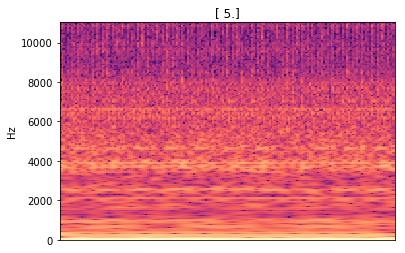

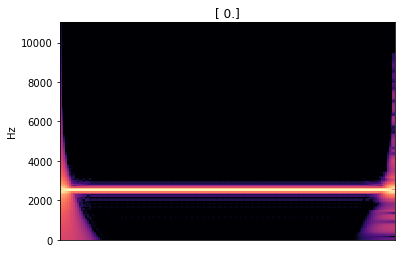

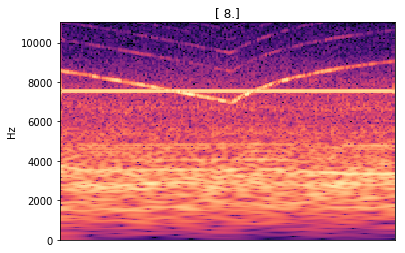

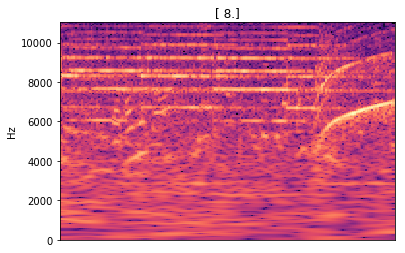

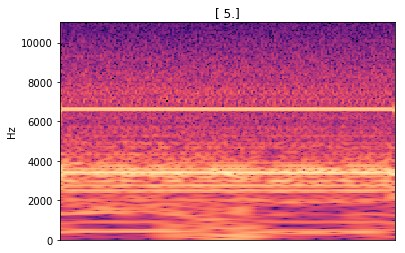

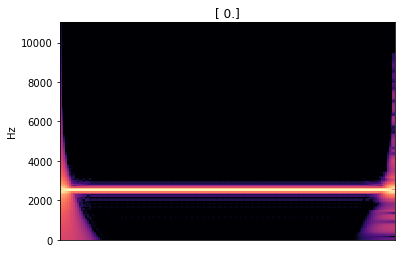

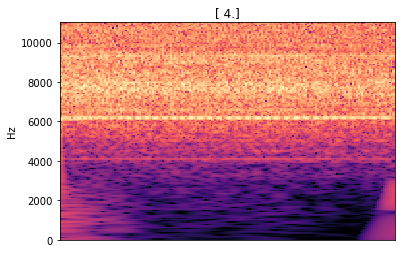

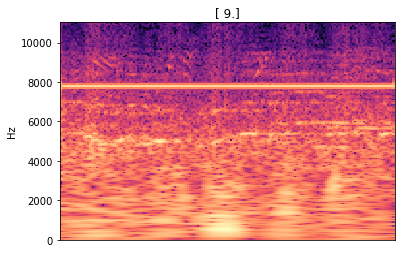

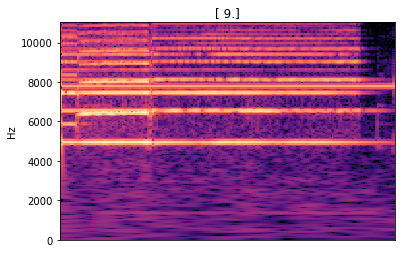

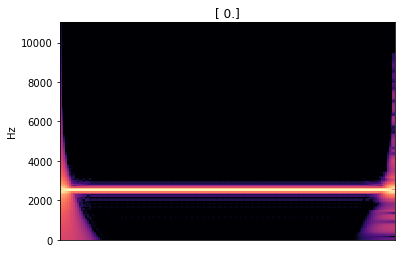

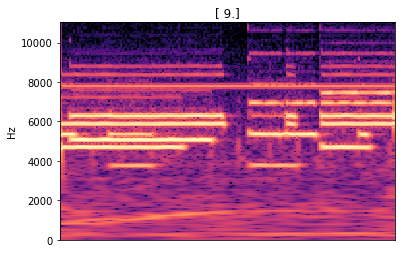

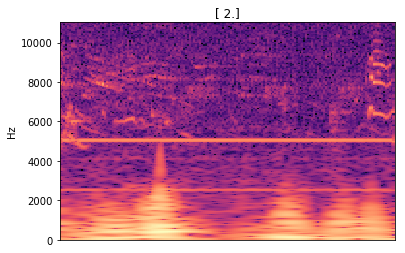

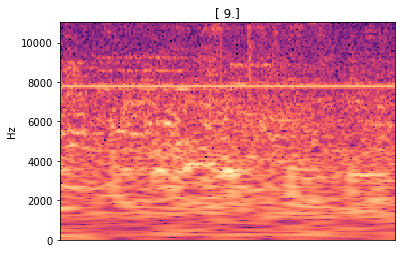

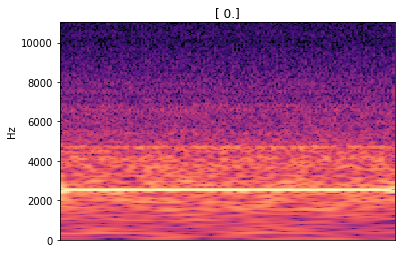

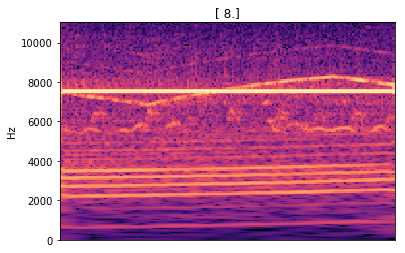

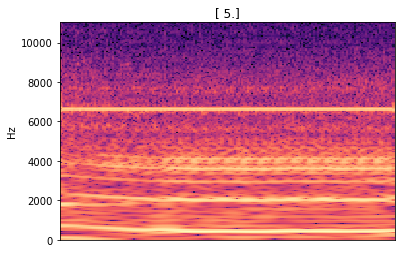

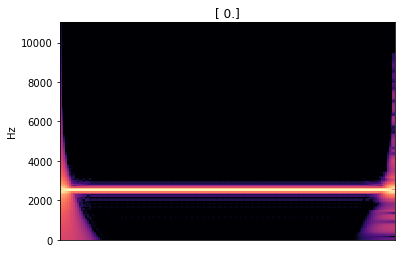

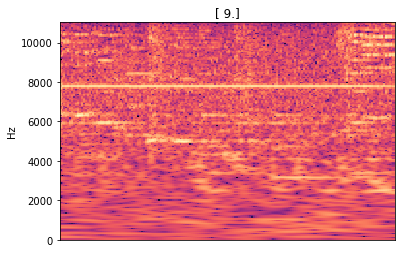

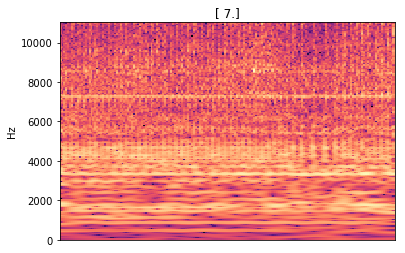

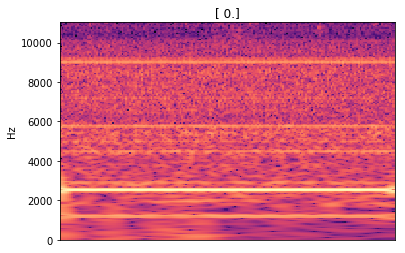

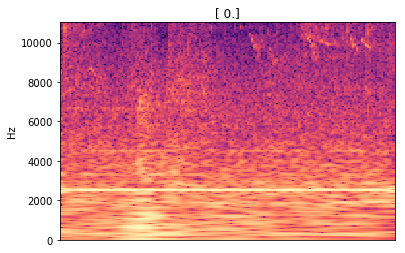

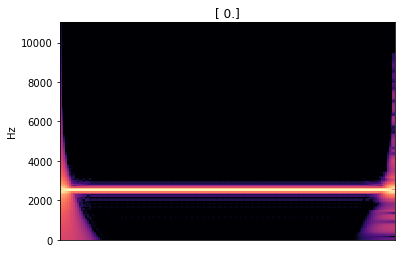

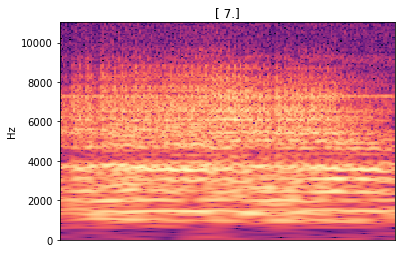

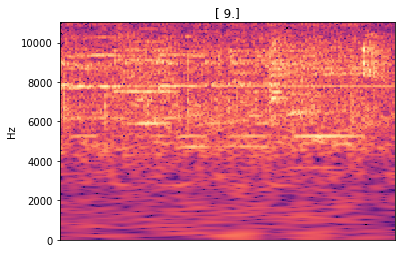

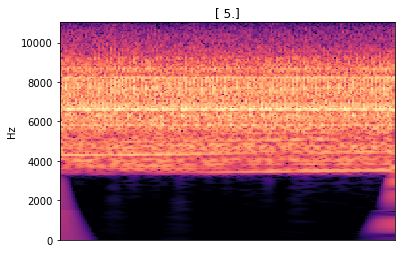

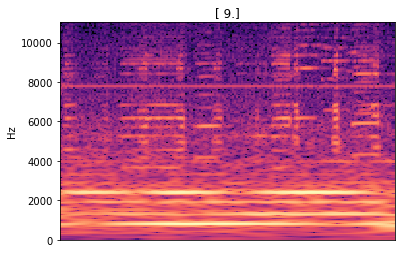

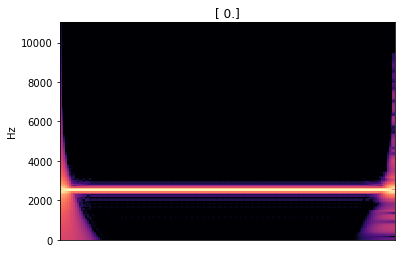

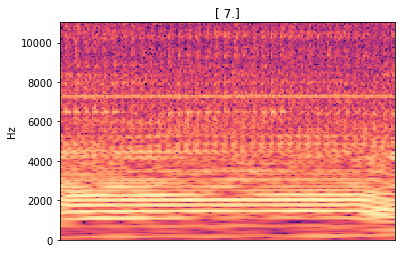

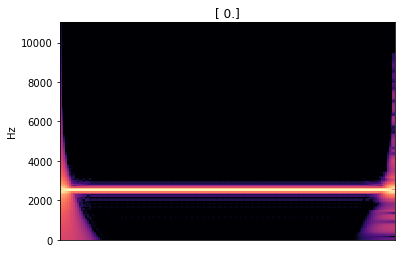

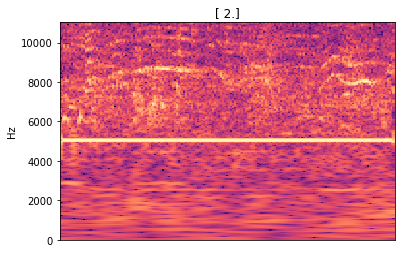

In [41]:
for i in range(30):
    plt.figure()
    librosa.display.specshow(tmp_train[i], y_axis='hz')
    plt.title(y_train[i])
    plt.savefig(str(i))
    plt.show()

In [ ]:
np.shape(tmp_train)

In [ ]:
dims = np.shape(tmp_train)
X_train = tmp_train.reshape(dims[0],dims[1]*dims[2])

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# fn that returns trained Random Forest to make predictions
def train_and_test_RF_model(X_train, Y_train):
    RF = RandomForestRegressor()
    RF.fit(X_train, Y_train)
    # return the prediction we've trained
    print(np.rint(RF.predict))
    return np.rint(RF.predict)

# # fn that uses PCA to reduce dimensionality
# from sklearn.decomposition import PCA as PCA
# def PCA_red(X_data, n):
#     pca = PCA(n_components=40)
#     pca.fit(X_data)
#     X_red = pca.fit_transform(X_data)
#     return X_red

# fn that predicts using reduced dimensional space
def train_and_test_PCA_model(X_train):
    pca = PCA(n_components=4)
    pca.fit(X_train)
    #pca.fit
    #X_red = pca.fit_transform(X_train)
    #LR = LinearRegression()
    #LR.fit(X_red, Y_train)
    return pca.fit_transform

# fn that returns trained linear function to make predictions
def train_and_test_linear_model(X_train, Y_train):
    LR = LinearRegression()
    LR.fit(X_train, Y_train)
    # return the prediction we've trained
    return np.rint(LR.predict)

# RIDGE REG
def train_and_test_ridge_model(alpha):
    def helper(X_train, Y_train):
        reg = linear_model.Ridge(alpha=alpha)
        reg.fit(X_train, Y_train)
        return reg.predict
    return helper


# LASSO REG
def train_and_test_lasso_model(alpha):
    def helper(X_train, Y_train):
        reg = linear_model.Lasso(alpha=alpha)
        reg.fit(X_train, Y_train)
        return reg.predict
    return helper


# ELASTICNET REG
def train_and_test_elastic_net_model(alpha):
    def helper(X_train, Y_train):
        reg = linear_model.ElasticNet(alpha=alpha)
        reg.fit(X_train, Y_train)
        return reg.predict
    return helper

# SVM REG
def train_and_test_svm_model():
    def helper(X_train, Y_train):
        reg = SVR(kernel='rbf', C=1.0, epsilon=0.2)
        reg.fit(X_train, Y_train)
        return reg.predict
    return helper

In [32]:
# something wrong with error computation?
from training_and_validation import select_best_model
select_best_model(X_train, y_train, 4, train_and_test_ridge_model(0.1))

next validation set
training
got a prediction!
next validation set
training
got a prediction!
next validation set
training
got a prediction!
next validation set
training
got a prediction!


0.0

In [22]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [23]:
# ridge regression
rid_reg = linear_model.Ridge(alpha=0.1)
rid_reg.fit(X_train, y_train)
#run on training data for now
rid_reg_pred = rid_reg.predict(X_train)
#write_to_file("rid_reg_correct_more_features.csv", rid_reg_pred)

In [36]:
np.sum((y_train - np.rint(rid_reg_pred)) == 0)

1000

In [ ]:
# write a file for RF
rf = RandomForestRegressor(n_estimators=20)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
#write_to_file("rf_correct_more_features.csv", rf_pred)

In [ ]:
np.sum((y_train - np.rint(rf_pred)) == 0)